<figure style="float:right">
<a href="http://c51.lbl.gov/~walkloud/callat/">
    <img
    src="callat_logo.png"
    width="150"
    alt="CalLat logo"
    /img>
</a>
</figure>

# Jupyter notebook for CalLat gA project:

# sample correlation function fitter 

This notebook

## Import libraries

In [1]:
%load_ext autoreload

In [2]:
from __future__ import print_function
%autoreload
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import tables as h5
import scipy as sp
import numpy as np
np.set_printoptions(linewidth=180)
import fit_functions as fit_fh
import iminuit as mn
import random
import tqdm
import theano as th
import theano.tensor as Tn
import fh_fit as fh
import fit_params as fitp
print("python  version:", sys.version)
print("numpy   version:", np.__version__)
print("scipy   version:", sp.__version__)
print("iminuit version:", mn.__version__)

python  version: 2.7.14 (default, Jan  6 2018, 12:15:00) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
numpy   version: 1.14.2
scipy   version: 1.0.1
iminuit version: 1.1.1


**NOTE:** at the time of writing this notebook, iminuit v1.2 raises complaints about the positive definiteness of the chisq function.  v1.1.1 does not raise these warnings.  v1.1.1 results have been check against independent analysis.  The v1.2 results seem to be consistent with those from v1.1.1

## Override default analysis parameters

In [3]:
ens = 'a12m220L'
params = fitp.params
params['errors']['gA_11']=1
params['errors']['gA_10']=1
override = False
if override:# These parasm are for the a09m310 ensemble
    params['tau'] = 1
    params['bs'] = False
    params[ens]['seed'] = ens
    params[ens]['Nbs']  = 5000
    params[ens]['t_min_max'] = {
        'proton':[9,16],
        'gA'    :[3,12],
        'gV'    :[7,17]
    }
    params[ens]['plt_range'] = {
        'proton':[7,18,0.47,0.55],
        'gA'    :[0,15,1.1,1.5],
        'gV'    :[5,20,1.015,1.035]
    }
    params[ens]['fit_ini'] = {
        'E_0'   :.49241,
        'dE_10' :.408,
        'zs_0'  :2.2e-5,
        'zp_0'  :2.3e-3,
        'zs_1'  :1.3e-5,
        'zp_1'  :3.1e-3,
        'gA_00' :1.27,
        'gV_00' :1.02,
        'gA_11' :1.55,
        'gA_10' :-.01,
        'dAss_0':-4.7e-10,
        'dAps_0':-6.2e-8,
        'dAss_1':-4.2e-10,
        'dAps_1':1.5e-8,
        'gV_11' :1.06,
        'gV_10' :-0.066,
        'dVss_0':3.9e-10,
        'dVps_0':3.1e-8,
        'dVss_1':2.6e-11,
        'dVps_1':-4.1e-10,
    }

In [4]:
min_fh = fh.fit(ens,params)

FCN = 37.9060023446 
 TOTAL NCALL = 2221 
 NCALLS = 2221 
 
 
 EDM = 7.4063056386e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,E_0,6.131137e-01,1.889446e-03,0.000000e+00,0.000000e+00,,,
2,dE_10,6.732720e-01,5.453501e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,zs_0,7.993996e-05,5.766741e-07,0.000000e+00,0.000000e+00,0.0,1.0,
4,zp_0,5.454693e-03,4.078775e-05,0.000000e+00,0.000000e+00,,,
5,zs_1,7.400737e-05,5.103392e-06,0.000000e+00,0.000000e+00,0.0,1.0,
6,zp_1,2.415065e-03,2.368768e-04,0.000000e+00,0.000000e+00,,,
7,gA_00,1.278255e+00,1.601812e-02,0.000000e+00,0.000000e+00,,,
8,gA_11,5.198282e-01,6.537212e-01,0.000000e+00,0.000000e+00,,,
9,gA_10,4.462585e-01,3.306064e-01,0.000000e+00,0.000000e+00,,,
10,gV_00,1.020147e+00,3.468270e-03,0.000000e+00,0.000000e+00,,,


chi^2 = 37.9060, dof = 28, Q=0.1002


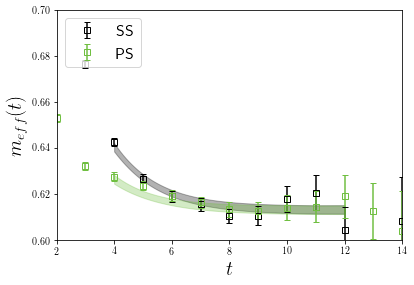

In [5]:
l_ss = ['E_0','dE_10','zs_0','zs_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1']
fh.plot_results(ens,params,min_fh,'proton',[l_ss,l_ps],'two_pt')

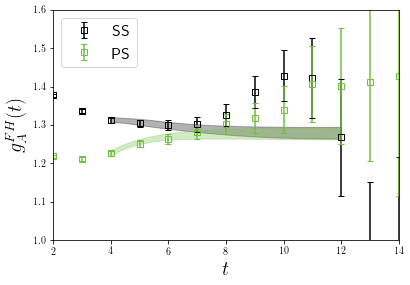

In [6]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gA_00','gA_11','gA_10','dAss_0','dAss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gA_00','gA_11','gA_10','dAps_0','dAps_1']
fh.plot_results(ens,params,min_fh,'gA',[l_ss,l_ps],'gA')

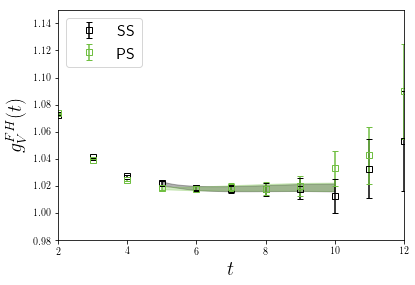

In [7]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gV_00','gV_11','gV_10','dVss_0','dVss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gV_00','gV_11','gV_10','dVps_0','dVps_1']
fh.plot_results(ens,params,min_fh,'gV',[l_ss,l_ps],'gV')

<center>
    <span style="color: black; font-family: Helvetica; font-size: 2em">
        These calculations are made possible by
    </span>
</center>

| | |
|:---:|:---:|
| [<img src='incite_logo.png' width='200'/>](http://www.doeleadershipcomputing.org/)  | [<img src='olcf_logo.png' width='320'/>](https://www.olcf.ornl.gov/) |
| [<img src='llnl_logo.png' width='640' />](https://hpc.llnl.gov/) | [<img src='scidac_logo.png' width='350' />](http://www.scidac.gov/) |